In [2]:
import pandas as pd
import matplotlib.pyplot as plt
homedir = '/users/cowherd/Documents/wy2023/'
snotel_data = pd.read_csv(homedir + 'data/snotel_ca_data.csv', index_col = 0, parse_dates=True)
usgs_data = pd.read_csv(homedir + 'data/usgs_ca_data.csv', index_col = 0, parse_dates=True)



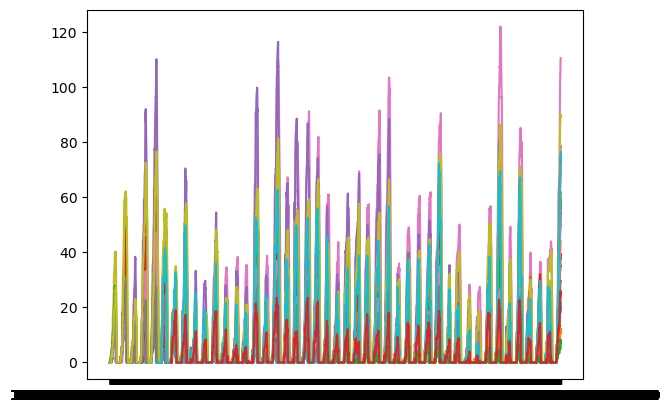

In [3]:
fig,ax=plt.subplots()
for point in snotel_data.groupby('geometry'):
    ax.plot(point[1].datetime, point[1].SWE)

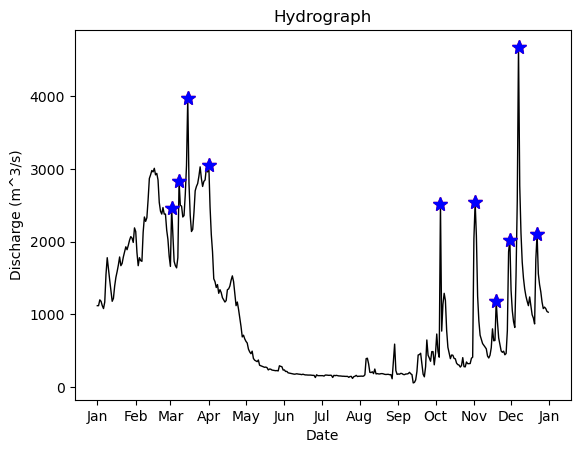

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

# Read the hydrograph data from a CSV file
df = usgs_data[usgs_data.site == 11443500]

# Set the datetime column as the index
df.set_index('datetime', inplace=True)
df = df[150:150+365]

# Define a threshold for flood events

# Define a threshold for the change in discharge within one week as 10% of the total range of the hydrograph
threshold = 0.1 * (df['DISCHARGE'].max() - df['DISCHARGE'].min())

# Find the local maxima associated
# Find the local maxima associated with flood events
flood_points = []

for i in range(1, len(df) - 1):
    if df.iloc[i]['DISCHARGE'] > df.iloc[i-1]['DISCHARGE'] and df.iloc[i]['DISCHARGE'] > df.iloc[i+1]['DISCHARGE']:
        start_date = df.index[i-1]
        end_date = df.index[i+1]
        one_week = pd.Timedelta(days=7)
        week_data = df[start_date:end_date]
        week_change = week_data['DISCHARGE'].max() - week_data['DISCHARGE'].min()
        if week_change > threshold:
            flood_points.append((df.index[i], df.iloc[i]['DISCHARGE']))

# Find the local minimum at the latest point before each flood
min_points = []
for flood_point in flood_points:
    latest_point_before_flood = df[:flood_point[0]].tail(1)
    if len(latest_point_before_flood) > 0:
        min_points.append((latest_point_before_flood.index[0], latest_point_before_flood.iloc[0]['DISCHARGE']))

# Plot the hydrograph
fig, ax = plt.subplots()
ax.plot(df.index, df['DISCHARGE'], color='black', linewidth=1)

# Add red and blue stars for the local minimum and local maximum associated with each flood event
for flood_point, min_point in zip(flood_points, min_points):
    ax.plot(min_point[0], min_point[1], marker='*', markersize=10, color='red')
    ax.plot(flood_point[0], flood_point[1], marker='*', markersize=10, color='blue')

# Set the title and axis labels
ax.set_title('Hydrograph')
ax.set_xlabel('Date')
ax.set_ylabel('Discharge (m^3/s)')

# Set the x-axis locator and formatter to show only the month
locator = MonthLocator()
formatter = DateFormatter('%b')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.show()


In [ ]:

# Convert the date strings to datetime objects
rainfall['date'] = pd.to_datetime(rainfall['date'])
snowfall['date'] = pd.to_datetime(snowfall['date'])
temperature['date'] = pd.to_datetime(temperature['date'])
hydrograph['date'] = pd.to_datetime(hydrograph['date'])

# Merge the rainfall and snowfall dataframes into a single dataframe
precipitation = pd.merge(rainfall, snowfall, on='date')

# Calculate the total precipitation for each day
precipitation['total'] = precipitation['rainfall'] + precipitation['snowfall']

# Merge the precipitation and temperature dataframes into a single dataframe
climate = pd.merge(precipitation, temperature, on='date')

# Merge the climate and hydrograph dataframes into a single dataframe
data = pd.merge(climate, hydrograph, on='date')


In [ ]:
## 1 match the usgs gages to their snotel stations

## 2 for each year, we want to know how flashy the melt was with respect to the temperature. 
## need some literature on how to calculate melt speed